In [2]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original',data_home='./')
mnist
#target 是标签，data是数据

E:\Jupystertry\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
E:\Jupystertry\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X,y=mnist["data"],mnist["target"]
X.shape

(70000, 784)

<function matplotlib.pyplot.show(*args, **kw)>

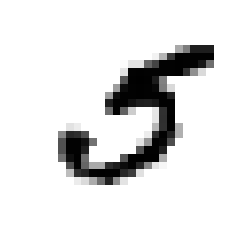

In [4]:
import matplotlib
import matplotlib.pyplot as plt
somedigit=X[36000]
somedigit_image=somedigit.reshape(28,28)
plt.imshow(somedigit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show

In [12]:
y[36000]

5.0

In [7]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
#乱排序
import numpy as np
shuffle_index=np.random.permutation(60000)
shuffle_index

array([26108,  8492, 22347, ..., 58630, 27216, 19806])

In [9]:
x_train=x_train[shuffle_index]
y_train=y_train[shuffle_index]
y_train=(y_train==5)
y_test=(y_test==5)

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
topredict=x_train[6]

In [26]:
topredict.shape

(784,)

In [29]:
sgd_clf.predict(topredict.reshape(1,-1))

array([False])

In [30]:
#自作交叉验证函数
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3, random_state=42)  #随机抽层分割方法
for train_index, test_index in skfold.split(x_train,y_train):
    clone_clf=clone(sgd_clf)
    x_train_fold=x_train[train_index]
    y_train_fold=y_train[train_index]
    x_test_fold=x_train[test_index]
    y_test_fold=y_train[test_index]
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.96545


0.9661


0.96075
